sin関数をRidge回帰でモデル化

In [81]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

train_size = 20
test_size = 12
train_X = np.random.uniform(low=0, high=1.2, size=train_size)
test_X = np.random.uniform(low=0.1, high=1.3, size=test_size)

指定したsize分のランダムな変数を生成する。  
よって実行毎に結果が異なる。  
```np.random.uniform```   

下記の場合は負の数も含む。  
```np.random.normal``` 

In [76]:
train_X = np.random.uniform(low=0, high=1.2, size=train_size)
train_X

array([0.99153602, 0.18419708, 0.71622854, 0.47706557, 0.4802536 ,
       0.3530999 , 0.00202881, 1.06584142, 0.32400253, 0.28936423,
       0.8312548 , 0.55728924, 0.23079874, 0.97573446, 0.58300129,
       0.88315024, 0.55247997, 0.54348833, 0.05892825, 0.02786872])

In [82]:
train_y = np.sin(train_X * 2 * np.pi) + np.random.normal(0, 0.2, train_size)
test_y = np.sin(test_X * 2 * np.pi) + np.random.normal(0, 0.2, test_size)

```PolynomialFeatures``` 回帰モデルの次数を指定  
```fit_transform``` fitによる正規化の式変換と、transformによる値の算出を一度に行う  
```reshape(a, b)``` ベースとなる配列をaxb列に変換する

In [90]:
poly = PolynomialFeatures(6)
train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))

```alpha``` 正則化の強さをコントロールするパラメータ(罰則項の係数)

In [107]:
model = Ridge(alpha=1.0)
model.fit(train_poly_X, train_y)
train_pred_y = model.predict(train_poly_X)

test_poly_X = np.sort(test_poly_X, axis = 0)

test_pred_y = model.predict(test_poly_X)

```mean_squared_error``` 平均二乗誤差を算出する

In [105]:
print(mean_squared_error(train_pred_y, train_y))
print(mean_squared_error(test_pred_y, test_y))

0.21202583719572807
0.42414331515211434


生成した乱数データを描画し、罰則係数αに応じたRidge曲線を追加する

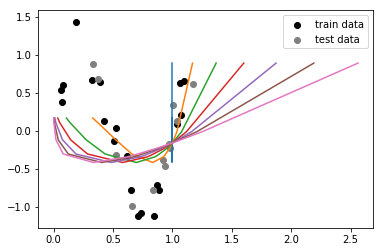

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



plt.plot(test_poly_X, test_pred_y)
plt.scatter(train_X, train_y, c = "black", label = "train data")
plt.scatter(test_X, test_y, c = "gray", label = "test data")

plt.legend()
plt.show()